In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.utils import np_utils
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [74]:
import math

'''The Following Datasets are prepared during the processing part of the datasets in Linear Regression
                                              Please run that code first!'''

a = input("Enter 1 for Human Observed Data, Concatenated Features\nEnter 2 for Human Observed Data, Subtracted Features\n\nEnter 3 for GSC Data, Concatenated Features\nEnter 4 for GSC Data, Subtracted Features\n")
if(a == str(1)):
    data = pd.read_csv("HOD_concat_dataset_logi.csv")
    M = 18
elif(a == str(2)):
    data = pd.read_csv("HOD_sub_dataset_logi.csv")
    M = 9
elif(a == str(3)):
    data = pd.read_csv("GSC_concat_dataset_logi.csv")
    M = 1024
elif(a == str(4)):
    data = pd.read_csv("GSC_sub_dataset_logi.csv")  
    M = 512


Enter 1 for Human Observed Data, Concatenated Features
Enter 2 for Human Observed Data, Subtracted Features

Enter 3 for GSC Data, Concatenated Features
Enter 4 for GSC Data, Subtracted Features
1


In [75]:
rows = data.shape[0]
cols = data.shape[1]
# Process Dataset
#
TrainPercent = 90
TestPercent = 10

train_X = data.iloc[0:int(math.ceil(data.shape[0]*0.01*TrainPercent)):,0:cols-1]
train_count= int(math.ceil(data.shape[0]*0.01*TrainPercent))
print(train_count)
print(train_X.shape)
train_Y = data.iloc[0:int(math.ceil(data.shape[0]*0.01*TrainPercent)):,cols-1:cols]
print(train_Y.shape)

1424
(1424, 18)
(1424, 1)


In [91]:
def get_model():
    input_size = len(train_X.columns)
    drop_out = 0.03
    first_dense_layer_nodes  = 1024
    second_dense_layer_nodes = 32
    final_dense_layer_nodes = 2
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dense(final_dense_layer_nodes))
    model.add(Activation('softmax'))

    
    model.summary()
    
    sgd = keras.optimizers.SGD(lr=0.1, decay=0.001, momentum=0.9, nesterov=True)
    
    model.compile(loss='binary_crossentropy', optimizer="adam",metrics=['accuracy'])
    
    return model

model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 1024)              19456     
_________________________________________________________________
activation_65 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                32800     
_________________________________________________________________
activation_66 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 66        
_________________________________________________________________
activation_67 (Activation)   (None, 2)                 0         
Total para

In [92]:
validation_data_split = 0.5
num_epochs = 10000
model_batch_size = 150
early_patience = 500

earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

model_hist = model.fit(train_X
                    , to_categorical(train_Y)
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [earlystopping_cb]
                   )

Train on 712 samples, validate on 712 samples
Epoch 1/10000
712/712 [==============================] - 1s 2ms/step - loss: 0.7133 - acc: 0.5098 - val_loss: 0.6957 - val_acc: 0.5028
Epoch 2/10000
712/712 [==============================] - 0s 84us/step - loss: 0.6910 - acc: 0.5140 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 3/10000
712/712 [==============================] - 0s 80us/step - loss: 0.6863 - acc: 0.5281 - val_loss: 0.6947 - val_acc: 0.5126
Epoch 4/10000
712/712 [==============================] - 0s 90us/step - loss: 0.6776 - acc: 0.5829 - val_loss: 0.6952 - val_acc: 0.5197
Epoch 5/10000
712/712 [==============================] - 0s 85us/step - loss: 0.6728 - acc: 0.5787 - val_loss: 0.6944 - val_acc: 0.5281
Epoch 6/10000
712/712 [==============================] - 0s 90us/step - loss: 0.6673 - acc: 0.5871 - val_loss: 0.7004 - val_acc: 0.5393
Epoch 7/10000
712/712 [==============================] - 0s 83us/step - loss: 0.6647 - acc: 0.5871 - val_loss: 0.7078 - val_acc: 0.5365
Epo

712/712 [==============================] - 0s 90us/step - loss: 0.3150 - acc: 0.8961 - val_loss: 0.9198 - val_acc: 0.5042
Epoch 61/10000
712/712 [==============================] - 0s 97us/step - loss: 0.3115 - acc: 0.8890 - val_loss: 0.9185 - val_acc: 0.5042
Epoch 62/10000
712/712 [==============================] - 0s 90us/step - loss: 0.2954 - acc: 0.9101 - val_loss: 0.9427 - val_acc: 0.5154
Epoch 63/10000
712/712 [==============================] - 0s 84us/step - loss: 0.3039 - acc: 0.8947 - val_loss: 0.9565 - val_acc: 0.5140
Epoch 64/10000
712/712 [==============================] - 0s 78us/step - loss: 0.2841 - acc: 0.9143 - val_loss: 0.9736 - val_acc: 0.5084
Epoch 65/10000
712/712 [==============================] - 0s 84us/step - loss: 0.2879 - acc: 0.9087 - val_loss: 0.9582 - val_acc: 0.5169
Epoch 66/10000
712/712 [==============================] - 0s 85us/step - loss: 0.2813 - acc: 0.9157 - val_loss: 0.9616 - val_acc: 0.5056
Epoch 67/10000
712/712 [==============================] 

Epoch 120/10000
712/712 [==============================] - 0s 97us/step - loss: 0.0549 - acc: 1.0000 - val_loss: 1.5371 - val_acc: 0.4874
Epoch 121/10000
712/712 [==============================] - 0s 87us/step - loss: 0.0555 - acc: 0.9986 - val_loss: 1.5471 - val_acc: 0.4888
Epoch 122/10000
712/712 [==============================] - 0s 83us/step - loss: 0.0562 - acc: 0.9972 - val_loss: 1.5520 - val_acc: 0.4902
Epoch 123/10000
712/712 [==============================] - 0s 77us/step - loss: 0.0522 - acc: 0.9986 - val_loss: 1.5703 - val_acc: 0.4902
Epoch 124/10000
712/712 [==============================] - 0s 90us/step - loss: 0.0524 - acc: 0.9958 - val_loss: 1.5812 - val_acc: 0.4860
Epoch 125/10000
712/712 [==============================] - 0s 83us/step - loss: 0.0512 - acc: 0.9972 - val_loss: 1.6116 - val_acc: 0.5000
Epoch 126/10000
712/712 [==============================] - 0s 105us/step - loss: 0.0516 - acc: 1.0000 - val_loss: 1.6265 - val_acc: 0.4930
Epoch 127/10000
712/712 [========

712/712 [==============================] - 0s 123us/step - loss: 0.0153 - acc: 1.0000 - val_loss: 2.0386 - val_acc: 0.4775
Epoch 180/10000
712/712 [==============================] - 0s 112us/step - loss: 0.0148 - acc: 1.0000 - val_loss: 2.0630 - val_acc: 0.4803
Epoch 181/10000
712/712 [==============================] - 0s 116us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 2.0764 - val_acc: 0.4775
Epoch 182/10000
712/712 [==============================] - 0s 116us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 2.0656 - val_acc: 0.4874
Epoch 183/10000
712/712 [==============================] - 0s 109us/step - loss: 0.0155 - acc: 0.9986 - val_loss: 2.0709 - val_acc: 0.4916
Epoch 184/10000
712/712 [==============================] - 0s 146us/step - loss: 0.0130 - acc: 1.0000 - val_loss: 2.1055 - val_acc: 0.4747
Epoch 185/10000
712/712 [==============================] - ETA: 0s - loss: 0.0151 - acc: 1.000 - 0s 122us/step - loss: 0.0144 - acc: 1.0000 - val_loss: 2.0890 - val_acc: 0.4930
Epoch

Epoch 238/10000
712/712 [==============================] - 0s 83us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 2.3715 - val_acc: 0.4789
Epoch 239/10000
712/712 [==============================] - 0s 91us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 2.3695 - val_acc: 0.4916
Epoch 240/10000
712/712 [==============================] - 0s 91us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 2.4107 - val_acc: 0.4930
Epoch 241/10000
712/712 [==============================] - 0s 90us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.3766 - val_acc: 0.4846
Epoch 242/10000
712/712 [==============================] - 0s 95us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 2.4024 - val_acc: 0.4986
Epoch 243/10000
712/712 [==============================] - 0s 97us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 2.4213 - val_acc: 0.4916
Epoch 244/10000
712/712 [==============================] - 0s 87us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 2.3861 - val_acc: 0.4874
Epoch 245/10000
712/712 [=========

712/712 [==============================] - 0s 85us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 2.6100 - val_acc: 0.4817
Epoch 298/10000
712/712 [==============================] - 0s 84us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 2.6032 - val_acc: 0.4831
Epoch 299/10000
712/712 [==============================] - 0s 87us/step - loss: 0.0058 - acc: 0.9986 - val_loss: 2.6847 - val_acc: 0.4958
Epoch 300/10000
712/712 [==============================] - 0s 91us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 2.6775 - val_acc: 0.4888
Epoch 301/10000
712/712 [==============================] - 0s 87us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 2.6145 - val_acc: 0.4916
Epoch 302/10000
712/712 [==============================] - 0s 80us/step - loss: 0.0084 - acc: 0.9986 - val_loss: 2.6397 - val_acc: 0.4874
Epoch 303/10000
712/712 [==============================] - 0s 81us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 2.6440 - val_acc: 0.4733
Epoch 304/10000
712/712 [=========================

712/712 [==============================] - 0s 90us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.7780 - val_acc: 0.4860
Epoch 357/10000
712/712 [==============================] - 0s 90us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 2.8742 - val_acc: 0.4986
Epoch 358/10000
712/712 [==============================] - 0s 101us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.8669 - val_acc: 0.4958
Epoch 359/10000
712/712 [==============================] - 0s 112us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.9282 - val_acc: 0.4972
Epoch 360/10000
712/712 [==============================] - 0s 112us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 2.8668 - val_acc: 0.4733
Epoch 361/10000
712/712 [==============================] - 0s 126us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 2.9308 - val_acc: 0.4902
Epoch 362/10000
712/712 [==============================] - 0s 106us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 2.8418 - val_acc: 0.4789
Epoch 363/10000
712/712 [====================

712/712 [==============================] - 0s 81us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 3.0165 - val_acc: 0.4958
Epoch 416/10000
712/712 [==============================] - 0s 92us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 3.0669 - val_acc: 0.4902
Epoch 417/10000
712/712 [==============================] - 0s 85us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 2.9730 - val_acc: 0.4916
Epoch 418/10000
712/712 [==============================] - 0s 95us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 3.0646 - val_acc: 0.5000
Epoch 419/10000
712/712 [==============================] - 0s 90us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.9687 - val_acc: 0.4930
Epoch 420/10000
712/712 [==============================] - 0s 95us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 3.0816 - val_acc: 0.4944
Epoch 421/10000
712/712 [==============================] - 0s 85us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.9997 - val_acc: 0.4888
Epoch 422/10000
712/712 [=========================

712/712 [==============================] - 0s 98us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 3.1664 - val_acc: 0.4916
Epoch 474/10000
712/712 [==============================] - 0s 84us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.1675 - val_acc: 0.4888
Epoch 475/10000
712/712 [==============================] - ETA: 0s - loss: 6.8005e-04 - acc: 1.000 - 0s 87us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.1309 - val_acc: 0.4874
Epoch 476/10000
712/712 [==============================] - 0s 102us/step - loss: 9.4271e-04 - acc: 1.0000 - val_loss: 3.1614 - val_acc: 0.4986
Epoch 477/10000
712/712 [==============================] - 0s 87us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 3.1643 - val_acc: 0.4944
Epoch 478/10000
712/712 [==============================] - 0s 85us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.1882 - val_acc: 0.4817
Epoch 479/10000
712/712 [==============================] - 0s 85us/step - loss: 7.0831e-04 - acc: 1.0000 - val_loss: 3.2404 - val_acc: 0.4846

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B3F4B71D0>,
      dtype=object)

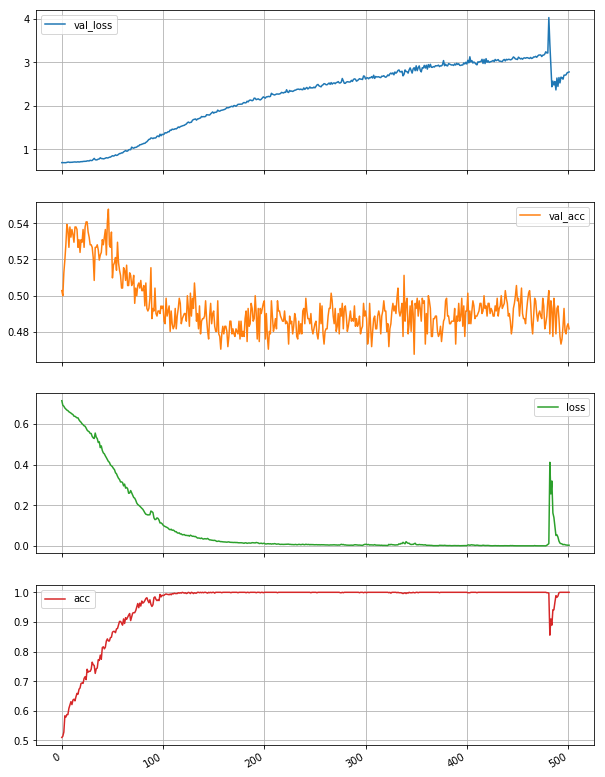

In [93]:
%matplotlib inline
df = pd.DataFrame(model_hist.history)
df.plot(subplots=True, grid=True, figsize=(10,15))
